In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
import pandas as pd
from course_labs.linear_regression import compute_cost_multi_variable, compute_gradient ,gradient_descent_multi_variable


In [11]:
# Load  data
df = pd.read_csv("Student_Performance.csv")
print("Environment and Imports: OK")

Environment and Imports: OK


In [12]:
# Process data to convert Yes no string to Number
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X = df.drop('Performance Index', axis=1).values
y = df['Performance Index'].values

# Zscore Normalization
def zscore_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_train, mu, sigma = zscore_normalize(X)

In [13]:
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
alpha = 0.1
iters = 1000

w_final, b_final, j_hist = gradient_descent_multi_variable(
    X_train, y, initial_w, initial_b,
    compute_cost_multi_variable, compute_gradient,
    alpha, num_iters=1000
)

Iteration    0: Cost  1385.26
Iteration  100: Cost     2.08
Iteration  200: Cost     2.08
Iteration  300: Cost     2.08
Iteration  400: Cost     2.08
Iteration  500: Cost     2.08
Iteration  600: Cost     2.08
Iteration  700: Cost     2.08
Iteration  800: Cost     2.08
Iteration  900: Cost     2.08


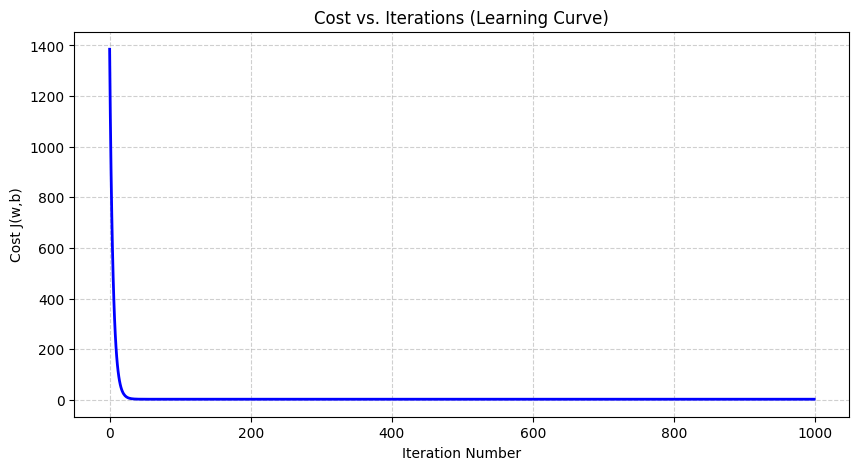

In [14]:
import matplotlib.pyplot as plt

# Plot the cost over all iterations
plt.figure(figsize=(10, 5))
plt.plot(j_hist, color='blue', linewidth=2)

# Styling
plt.title("Cost vs. Iterations (Learning Curve)")
plt.xlabel("Iteration Number")
plt.ylabel("Cost J(w,b)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
# Testing Some Prediction
# Hours Studied, Previous Scores, Extracurricular (1/0), Sleep Hours, Sample Papers
new_student_raw = np.array([8, 85, 1, 7, 5])

# Normalize the new data using the mu and sigma
new_student_norm = (new_student_raw - mu) / sigma

# Predict using the final parameters
prediction = np.dot(new_student_norm, w_final) + b_final

print(f"Predicted Performance Index: {prediction:.2f}")


Predicted Performance Index: 80.26
